**Assignment 1: Exploratory Data Analysis (EDA) and Visualization**

**Part 1 Understand Business Context**
  - Brainstorm with your group to define what you want to explore. Do you have - a research question or a theory? Identify the 'business problem' you're addressing.


We have the following research question that we aim to investigate and attempt to answer:
Do men borrow more money than women?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import altair as alt


os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

!kaggle datasets download -d kiva/data-science-for-good-kiva-crowdfunding --unzip

data = pd.read_csv("kiva_loans.csv")
data2 = pd.read_csv("loan_theme_ids.csv")
data3 = pd.read_csv("kiva_mpi_region_locations.csv")
data4 = pd.read_csv("loan_themes_by_region.csv")

Dataset URL: https://www.kaggle.com/datasets/kiva/data-science-for-good-kiva-crowdfunding
License(s): CC0-1.0
 88% 37.0M/41.9M [00:01<00:00, 29.3MB/s]
100% 41.9M/41.9M [00:01<00:00, 26.6MB/s]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

We inspect if any of the other CSV-files can be used.

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779092 entries, 0 to 779091
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               779092 non-null  int64  
 1   Loan Theme ID    764279 non-null  object 
 2   Loan Theme Type  764279 non-null  object 
 3   Partner ID       764279 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 23.8+ MB


In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LocationName  984 non-null    object 
 1   ISO           1008 non-null   object 
 2   country       1008 non-null   object 
 3   region        984 non-null    object 
 4   world_region  1008 non-null   object 
 5   MPI           984 non-null    float64
 6   geo           2772 non-null   object 
 7   lat           892 non-null    float64
 8   lon           892 non-null    float64
dtypes: float64(3), object(6)
memory usage: 195.0+ KB


In [ ]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15736 entries, 0 to 15735
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Partner ID          15736 non-null  int64  
 1   Field Partner Name  15736 non-null  object 
 2   sector              15736 non-null  object 
 3   Loan Theme ID       15736 non-null  object 
 4   Loan Theme Type     15736 non-null  object 
 5   country             15736 non-null  object 
 6   forkiva             15736 non-null  object 
 7   region              15736 non-null  object 
 8   geocode_old         1200 non-null   object 
 9   ISO                 15722 non-null  object 
 10  number              15736 non-null  int64  
 11  amount              15736 non-null  int64  
 12  LocationName        15736 non-null  object 
 13  geocode             13662 non-null  object 
 14  names               13661 non-null  object 
 15  geo                 15736 non-null  object 
 16  lat 

We've chose not to combine any of the other datasets, as they are too small.

In [ ]:
list(data.columns)

['id',
 'funded_amount',
 'loan_amount',
 'activity',
 'sector',
 'use',
 'country_code',
 'country',
 'region',
 'currency',
 'partner_id',
 'posted_time',
 'disbursed_time',
 'funded_time',
 'term_in_months',
 'lender_count',
 'tags',
 'borrower_genders',
 'repayment_interval',
 'date']

In [ ]:
data.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


**Part 2 Data Cleaning and Manipulation**
  - Assess the dataset for quality issues and fix missing values, outliers, and data type inconsistencies.
  - Perform necessary transformations, create new variables, and normalize data if appropriate.
  - If needed, merge data from multiple sources using appropriate joins.
  - Summarize data using groupby to calculate relevant statistics (e.g., sums, averages).

Cleaning the data

In [ ]:
print(data.isna().sum())

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
dtype: int64


In [ ]:
data.drop(['tags'], axis = 'columns', inplace = True)

We drop Tags, as these are just qoutes as "User favorite", etc. and it was a lot of NA's

In [ ]:
print(data.isna().sum())

id                        0
funded_amount             0
loan_amount               0
activity                  0
sector                    0
use                    4232
country_code              8
country                   0
region                56800
currency                  0
partner_id            13507
posted_time               0
disbursed_time         2396
funded_time           48331
term_in_months            0
lender_count              0
borrower_genders       4221
repayment_interval        0
date                      0
dtype: int64


In [ ]:
len(data)

671205

In [ ]:
data.dropna(inplace = True)

In [ ]:
len(data)

574115

In [ ]:
print(f'We just saved {(len(data) / 671205) * 100} % of the data!')
print(f'Number of remaining {len(data)} rows')

We just saved 85.53497068704792 % of the data!
Number of remaining 574115 rows


In [ ]:
data.borrower_genders.value_counts()

,count
borrower_genders,
female,377744
male,103365
"female, female",11410
"female, female, female",10390
"female, female, female, female",8384
...,...
"female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, male, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female",1
"male, female, male, female, female, female, female, male, male",1
"female, female, female, female, female, female, male, female, female, female, female, female, female, female, female, female, female, male, female, female, female, female, female, female, female, female, female, female, female, male, female, female, female, female, female, female",1


We have various combinations of borrowers, such as female-female or female-male pairs. However, we intend to categorize them simply as Male or Female, as managing group combinations presents additional complexity. Consequently, we remove all columns that do not represent either a male or female.

In [ ]:
valid_genders = ['male', 'female']
data = data[data['borrower_genders'].isin(valid_genders)]
data.borrower_genders.value_counts()

,count
borrower_genders,
female,377744
male,103365


In [ ]:
print(f'We just saved {(len(data) / 671205) * 100} % of the data!')
print(f'Number of remaining {len(data)} rows')

We just saved 71.67839929678712 % of the data!
Number of remaining 481109 rows


Summarize of the data and relevant statics such as mean, median, sum, min, max, variance, iqr

In [ ]:
data[['loan_amount','term_in_months','lender_count']].agg(['mean','var','min','median','max','sum'])

,loan_amount,term_in_months,lender_count
mean,5.893240e+02,1.393056e+01,1.714726e+01
var,6.185420e+05,7.388443e+01,5.819003e+02
min,2.500000e+01,2.000000e+00,1.000000e+00
median,4.000000e+02,1.300000e+01,1.200000e+01
max,1.000000e+05,1.580000e+02,2.986000e+03
sum,2.835291e+08,6.702119e+06,8.249703e+06


In [ ]:
data.groupby(['borrower_genders','sector'])[['loan_amount','term_in_months','lender_count']].agg(['mean','var','min','median','max','sum','std'])

loan_amount                               \
                                        mean           var    min  median   
borrower_genders sector                                                     
female           Agriculture      563.242771  5.570804e+05   25.0   375.0   
                 Arts             574.480256  6.781566e+05   50.0   400.0   
                 Clothing         626.261506  3.017223e+05   25.0   500.0   
                 Construction     634.569116  3.877002e+05   50.0   475.0   
                 Education        900.716883  8.753788e+05   25.0   675.0   
                 Entertainment    713.551402  5.963119e+05   75.0   475.0   
                 Food             458.653267  1.813060e+05   25.0   350.0   
                 Health           811.595816  1.157698e+06   50.0   600.0   
                 Housing          563.752648  2.427530e+05   25.0   475.0   
                 Manufacturing    511.181065  2.330061e+05   50.0   400.0   
                 Personal Use     468.676650  4.498050e+05   25.0   275.0   
                 Retail           467.340826  3.923127e+05   25.0   350.0   
                 Services         648.370016  6.574020e+05   25.0   425.0   
                 Transportation   491.597063  2.586731e+05   50.0   400.0   
                 Wholesale        866.271186  1.483123e+06   50.0   500.0   
male             Agriculture      688.837312  1.310800e+06   25.0   500.0   
                 Arts            1116.611374  2.084952e+06   50.0   700.0   
                 Clothing         821.826313  1.875555e+06   25.0   600.0   
                 Construction     936.890708  1.194825e+06   50.0   775.0   
                 Education        932.843779  1.146404e+06   25.0   725.0   
                 Entertainment   1086.641221  7.696868e+05   75.0   900.0   
                 Food             734.284845  4.092866e+05   50.0   575.0   
                 Health           911.779586  2.336629e+06   75.0   650.0   
                 Housing          836.742576  4.455031e+05   25.0   675.0   
                 Manufacturing   1000.945946  2.530768e+06   75.0   750.0   
                 Personal Use     515.204157  3.071112e+05   25.0   300.0   
                 Retail           745.574004  1.923494e+06   50.0   550.0   
                 Services         930.498615  1.192511e+06   50.0   700.0   
                 Transportation   712.178435  8.772253e+05   50.0   500.0   
                 Wholesale       1844.791667  2.365197e+07  100.0  1150.0   

                                                      term_in_months  \
                                      max         sum           mean   
borrower_genders sector                                                
female           Agriculture     100000.0  51734975.0      14.077266   
                 Arts             40000.0   4393625.0      12.866893   
                 Clothing         10000.0  11430525.0      12.664311   
                 Construction     12325.0   1450625.0      15.040682   
                 Education        17500.0  15108625.0      21.934899   
                 Entertainment     6600.0    229050.0      13.996885   
                 Food             30000.0  40355525.0      11.246445   
                 Health           50000.0   3646500.0      16.661919   
                 Housing          10000.0  10379250.0      21.576395   
                 Manufacturing     8750.0   1603575.0      12.671023   
                 Personal Use     10000.0   3833775.0      18.085208   
                 Retail           50000.0  39900625.0      10.452166   
                 Services         50000.0  16408300.0      14.451496   
                 Transportation    8575.0   3649125.0      12.517985   
                 Wholesale        14675.0    255550.0      13.227119   
male             Agriculture      50000.0  25857575.0      15.666924   
                 Arts             25000.0   1178025.0      13.382938   
                 Clothing         50000.0   1424225

**Part 3 Descriptive Statistics**
  - Calculate basic statistics for key variables (mean, median, variance, etc.).
  - Explore data distributions with histograms, box plots, and density plots.

Histogram

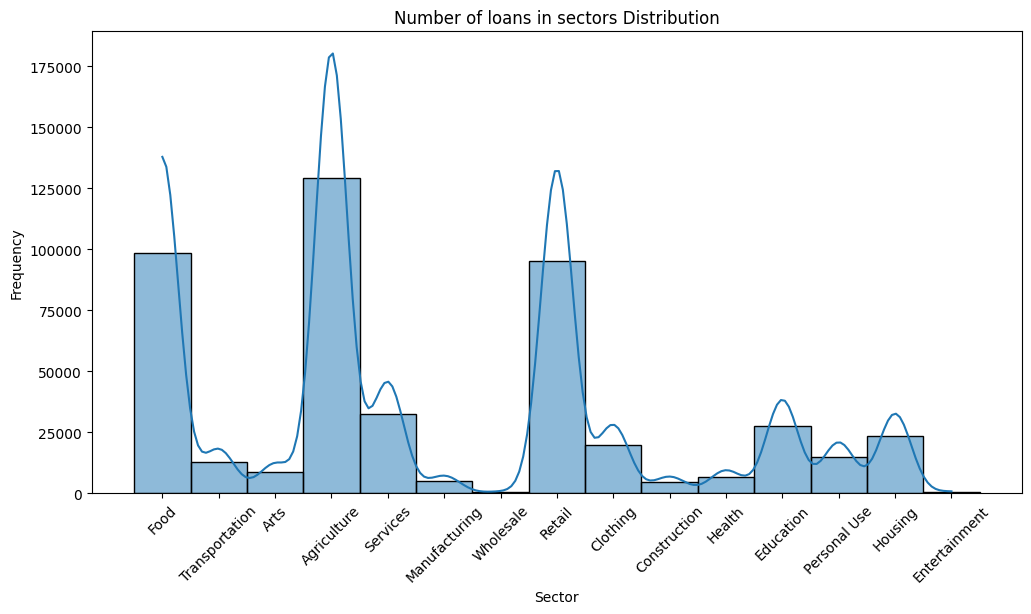

In [ ]:
#Another useful adjustment option;
plt.figure(figsize=(12, 6))

# Driver Age Distribution
sns.histplot(data['sector'], kde=True)
plt.title('Number of loans in sectors Distribution')

plt.xlabel('Sector')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Boxplot

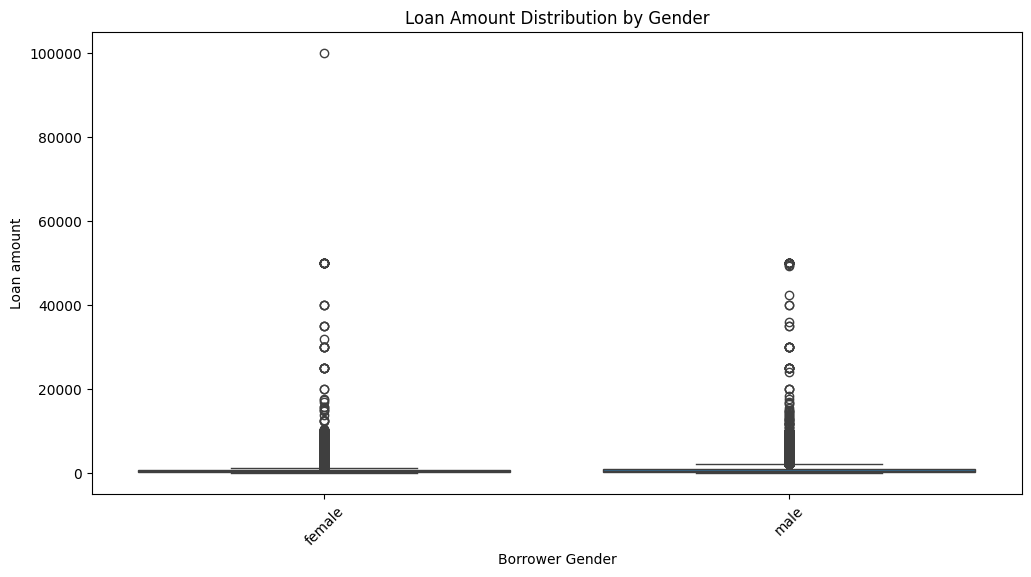

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='borrower_genders', y='loan_amount', data=data, order=data['borrower_genders'].value_counts().index)
plt.title('Loan Amount Distribution by Gender')
plt.xlabel('Borrower Gender')
plt.ylabel('Loan amount')
plt.xticks(rotation=45)
plt.show()

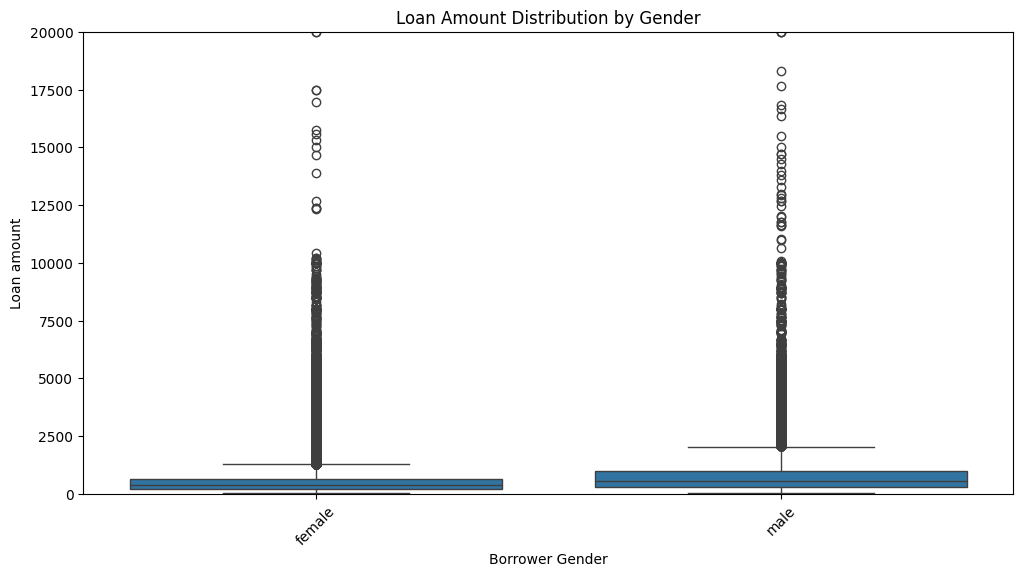

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='borrower_genders', y='loan_amount', data=data, order=data['borrower_genders'].value_counts().index)
plt.title('Loan Amount Distribution by Gender')
plt.xlabel('Borrower Gender')
plt.ylabel('Loan amount')
plt.xticks(rotation=45)
plt.ylim(0, 20000)
plt.show()

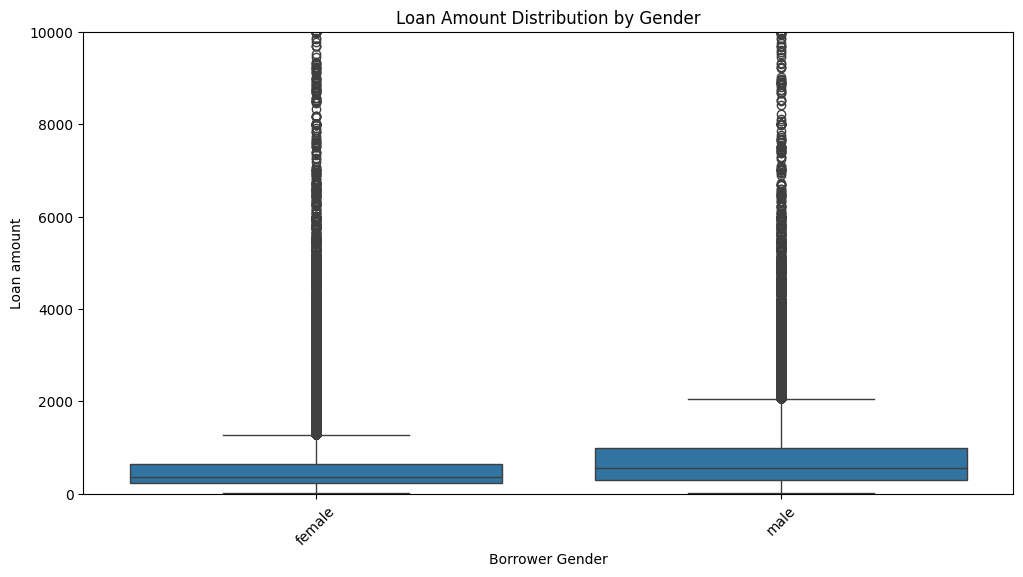

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='borrower_genders', y='loan_amount', data=data, order=data['borrower_genders'].value_counts().index)
plt.title('Loan Amount Distribution by Gender')
plt.xlabel('Borrower Gender')
plt.ylabel('Loan amount')
plt.xticks(rotation=45)
plt.ylim(0, 10000)
plt.show()

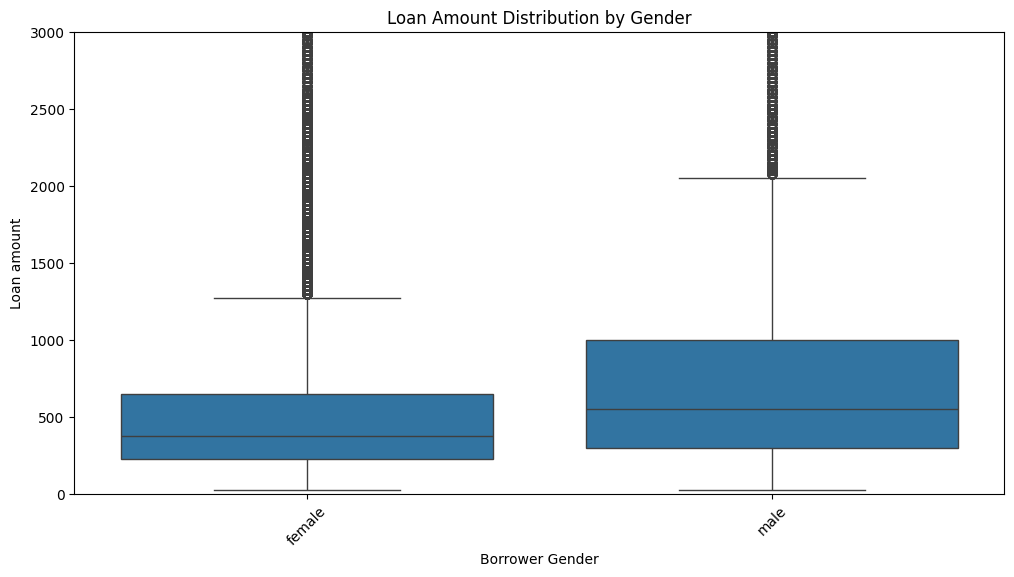

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='borrower_genders', y='loan_amount', data=data, order=data['borrower_genders'].value_counts().index)
plt.title('Loan Amount Distribution by Gender')
plt.xlabel('Borrower Gender')
plt.ylabel('Loan amount')
plt.xticks(rotation=45)
plt.ylim(0, 3000)
plt.show()

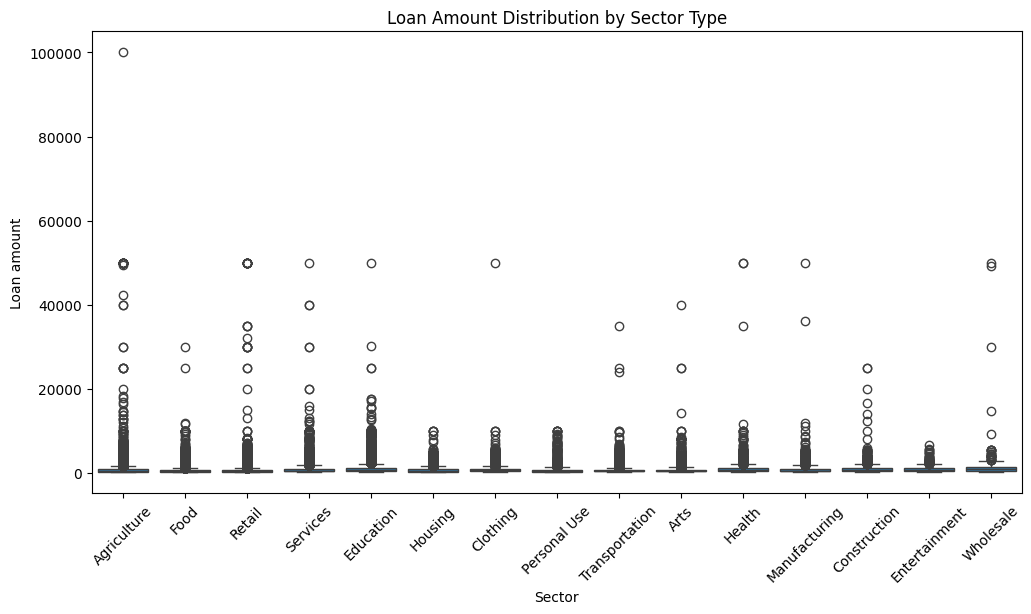

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='sector', y='loan_amount', data=data, order=data['sector'].value_counts().index)
plt.title('Loan Amount Distribution by Sector Type')
plt.xlabel('Sector')
plt.ylabel('Loan amount')
plt.xticks(rotation=45)
plt.show()

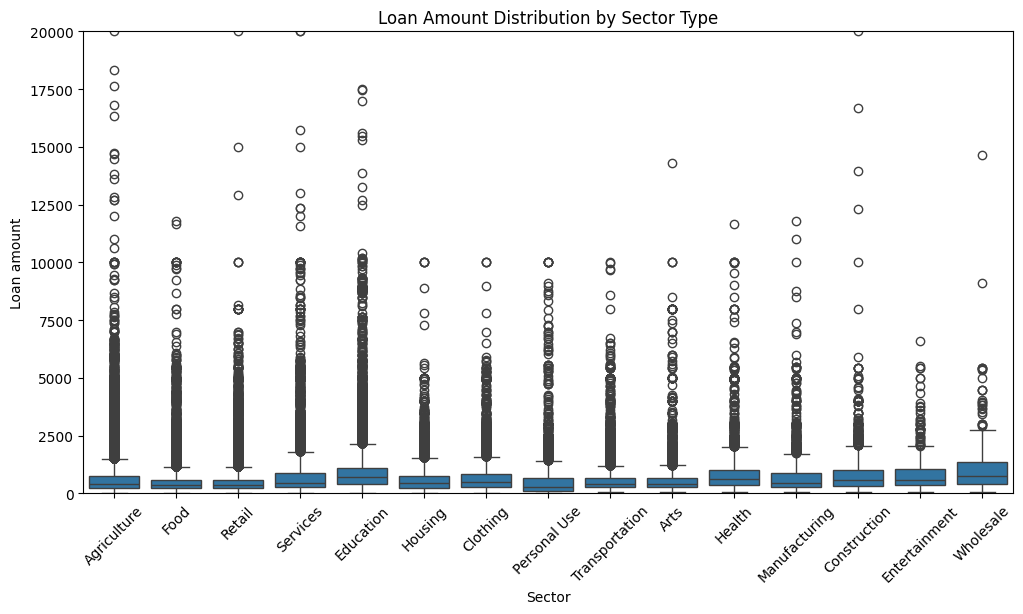

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='sector', y='loan_amount', data=data, order=data['sector'].value_counts().index)
plt.title('Loan Amount Distribution by Sector Type')
plt.xlabel('Sector')
plt.ylabel('Loan amount')
plt.xticks(rotation=45)
plt.ylim(0, 20000)
plt.show()

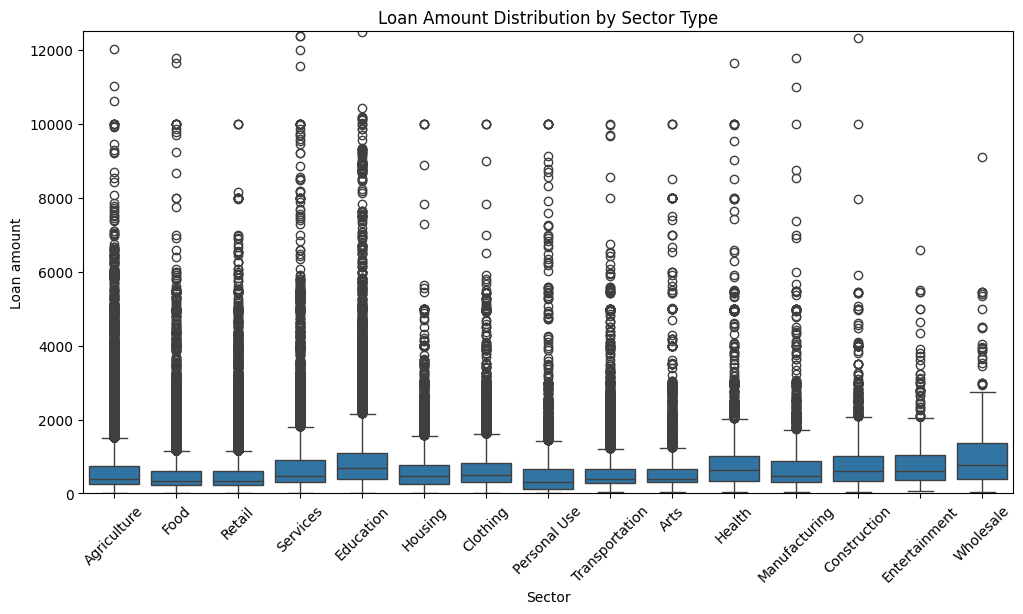

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='sector', y='loan_amount', data=data, order=data['sector'].value_counts().index)
plt.title('Loan Amount Distribution by Sector Type')
plt.xlabel('Sector')
plt.ylabel('Loan amount')
plt.xticks(rotation=45)
plt.ylim(0, 12500)
plt.show()

<Axes: xlabel='loan_amount', ylabel='Density'>

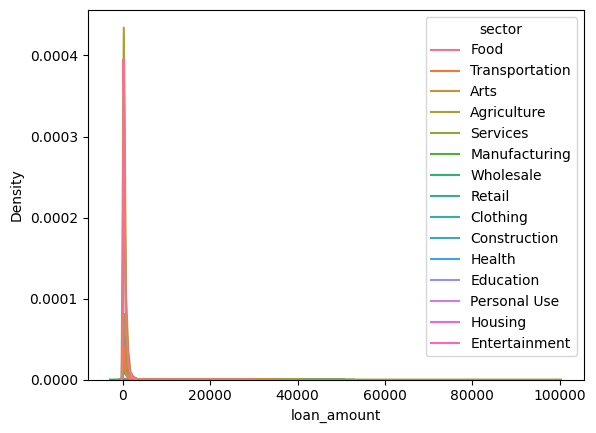

In [ ]:
sns.kdeplot(data = data, x = 'loan_amount', hue = 'sector')

<Axes: xlabel='loan_amount', ylabel='Density'>

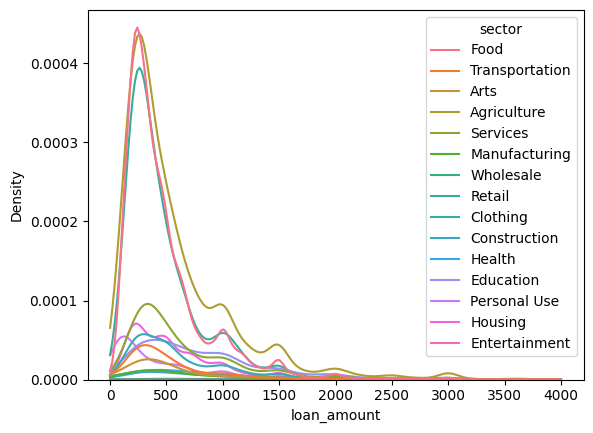

In [ ]:
sns.kdeplot(data = data, x = 'loan_amount', hue = 'sector', clip = (0,4000))

**Part 4 Exploratory Data Analysis (EDA) and Visualization**
  - Conduct thorough EDA of your chosen dataset.
  - Create insightful visualizations—avoid trivial visuals like pie charts. Focus on revealing key insights.

Now we will examinine the shape of a data distribution, skewness describes its asymmetry. A distribution is positively skewed if it has a longer right tail, with most data points on the left, and negatively skewed if it has a longer left tail, with most data points on the right.

Kurtosis describes the "tailedness" or the peak's sharpness. High kurtosis indicates heavier tails and more outliers, while low kurtosis suggests lighter tails and fewer extreme values. Skewness reflects the balance around the center, while kurtosis shows the distribution's peak and outliers.

In [ ]:
# Calculate kurtosis
loan_kurtosis = data['loan_amount'].kurtosis()

# Calculate skewness
loan_skewness = data['loan_amount'].skew()

loan_skewness, loan_kurtosis

(9.795428828397775, 312.097216004853)

The distribution is extremely positively skewed, with a long right tail indicating many high outliers. It also has very high kurtosis, suggesting a sharp peak and heavy tails with numerous extreme values.

Now we will calculate the IQR, a measure of statistical dispersion or spread, representing the difference between the upper and lower quartiles. In simpler terms, IQR indicates the range within which the central 50% of values lie. Although we have already shown this through the boxplot.

In [ ]:
# Calculate Q1 and Q3
Q1_loan = data['loan_amount'].quantile(0.25)
Q3_loan = data['loan_amount'].quantile(0.75)

# Calculate IQR
IQR_loan = Q3_loan - Q1_loan

IQR_loan

450.0

The IQR of 450 measures data spread around the median. A higher IQR indicates more variability, while a lower IQR shows that data points are more clustered. This means 50% of the loans lie within 450 of the median.

Correlation matrix

In [ ]:
correlation_matrix = data[['loan_amount', 'term_in_months', 'lender_count']].corr(method='spearman')
correlation_matrix

,loan_amount,term_in_months,lender_count
loan_amount,1.000000,0.401184,0.848183
term_in_months,0.401184,1.000000,0.490394
lender_count,0.848183,0.490394,1.000000


Text(0.5, 1.0, 'Correlation Matrix of Loan amount, length of loan and amount of lenders')

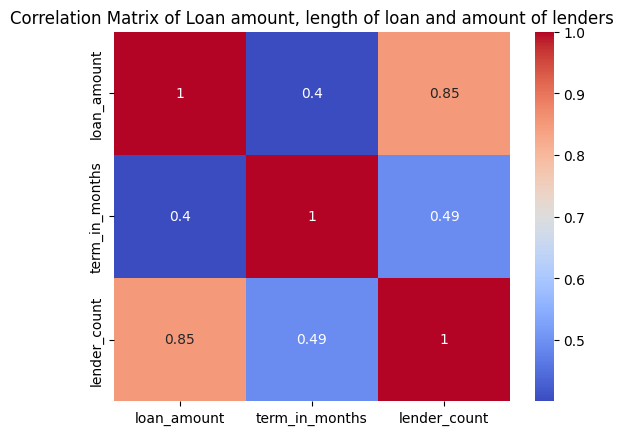

In [ ]:
# Visualizing the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm').set_title('Correlation Matrix of Loan amount, length of loan and amount of lenders')

In [ ]:
data['gender_binary'] = data['borrower_genders'].apply(lambda x: 1 if x == 'male' else 0)

In [ ]:
import statsmodels.formula.api as smf

model = smf.ols('loan_amount ~gender_binary+ lender_count+ term_in_months', data = data).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_amount   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                 3.942e+05
Date:                Sun, 08 Sep 2024   Prob (F-statistic):               0.00
Time:                        11:46:17   Log-Likelihood:            -5.3696e+06
No. Observations:              671205   AIC:                         1.074e+07
Df Residuals:                  671201   BIC:                         1.074e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        143.5832      1.704     84.

We can conclude with 75% significans that men borrow more money than women.